In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit
import astropy.table as at
import astropy.io.ascii as ac

In [2]:
dff=pd.read_csv('GlobalLandTemperaturesByState (1).csv')
df2=dff[["dt","AverageTemperature","State"]]
df2["dt"]=pd.to_datetime(df2["dt"])
df1=df2[df2["dt"].dt.year>=2000]
df=df1[df1["State"].isin(["Wyoming","Nebraska","South Dakota"])]
dfg=df.groupby("dt")["AverageTemperature"].mean().reset_index() #WERE WE TAUGHT THIS??? This appears to be the only way to fix this as otherwise, the columns break.
dfg['dt']=pd.to_datetime(dfg['dt'])
cdate=pd.to_datetime("2000-01-01")
dfg['newdt']=(dfg['dt']-cdate).dt.days
dfg

<ipython-input-2-45234f0b7cbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["dt"]=pd.to_datetime(df2["dt"])


,dt,AverageTemperature,newdt
0,2000-01-01,-4.072000,0
1,2000-02-01,-0.205000,31
2,2000-03-01,3.642667,60
3,2000-04-01,7.609667,91
4,2000-05-01,14.255000,121
...,...,...,...
160,2013-05-01,13.196000,4869
161,2013-06-01,18.783667,4900
162,2013-07-01,22.110333,4930
163,2013-08-01,21.890000,4961


In [3]:
def f(m,x,b):
  return m*x+b
p=[1,1]
dia=dfg["newdt"]
temp=dfg["AverageTemperature"]
temp

,AverageTemperature
0,-4.072000
1,-0.205000
2,3.642667
3,7.609667
4,14.255000
...,...
160,13.196000
161,18.783667
162,22.110333
163,21.890000


In [4]:
para,cv=fit.curve_fit(f,dia,temp,p)
y=f(para[0],dia,para[1],)

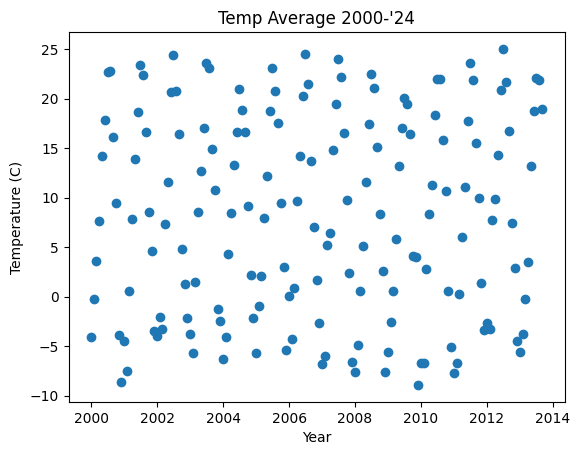

In [5]:
plt.figure()
plt.scatter(dfg["dt"],dfg["AverageTemperature"])
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.title("Temp Average 2000-'24")
plt.show()
#1.4 WE NEED BETTER INSTRUCTIONS, THESE ONES SUCK!!


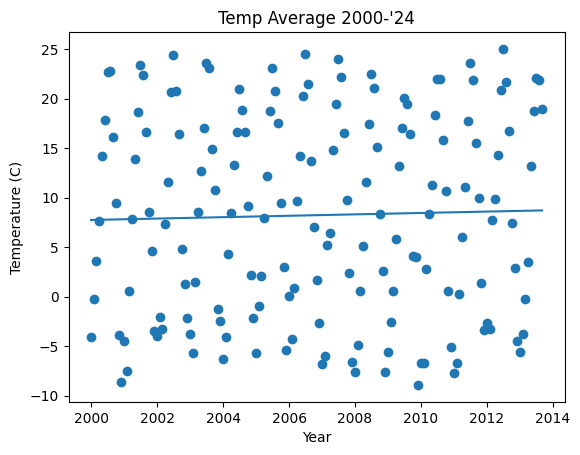

In [6]:
plt.figure()
plt.scatter(dfg["dt"],dfg["AverageTemperature"])
plt.plot(dfg['dt'],y)
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.title("Temp Average 2000-'24")
plt.show()

In [7]:
er1=round(cv[0,0]**(1/2),4)
er2=round(cv[1,1]**(1/2),4)
m=round(para[0],4)
b=round(para[1],4)
print("m=",m,"±",er1)
print("b=",b,"±",er2)
print("y=",m,"x+",b)

m= 0.0002 ± 0.0005
b= 7.7465 ± 1.5698
y= 0.0002 x+ 7.7465


In [31]:
accl=ac.read('global_CCl4_MM.dat')
pccl=accl.to_pandas()
p1ccl=pccl.to_csv('global_CCl4_MM.csv')
cccl=pd.read_csv('global_CCl4_MM.csv')
ccl=cccl[['CCl4ottoyr','CCl4ottoGLm','CCl4ottoGLsd']]
ccl=ccl.dropna()
ccl

,CCl4ottoyr,CCl4ottoGLm,CCl4ottoGLsd
3,1996,104.144,0.155
4,1996,103.893,0.174
5,1996,104.207,0.191
6,1996,104.136,0.147
7,1996,103.836,0.161
...,...,...,...
278,2019,79.008,0.199
279,2019,78.623,0.149
280,2019,78.862,0.226
281,2019,78.598,0.165


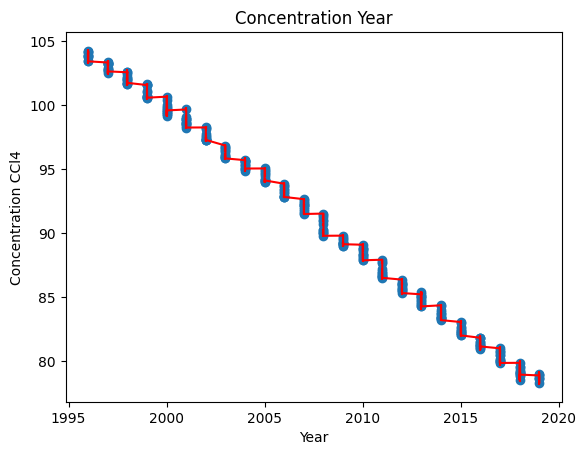

In [37]:
plt.figure()
plt.scatter(ccl["CCl4ottoyr"],ccl['CCl4ottoGLm'])
plt.errorbar(ccl["CCl4ottoyr"],ccl['CCl4ottoGLm'],yerr=ccl['CCl4ottoGLsd'],fmt='red')
plt.xlabel("Year")
plt.ylabel("Concentration CCl4")
plt.title("Concentration Year")
plt.show()

In [34]:
para,cv=fit.curve_fit(f,ccl["CCl4ottoyr"],ccl['CCl4ottoGLm'],p)
y=f(para[0],ccl["CCl4ottoyr"],para[1])
y

,CCl4ottoyr
3,104.346459
4,104.346459
5,104.346459
6,104.346459
7,104.346459
...,...
278,78.051398
279,78.051398
280,78.051398
281,78.051398


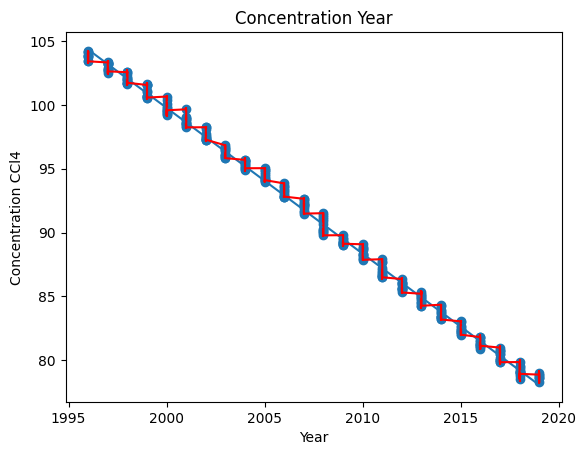

In [36]:
plt.figure()
plt.scatter(ccl["CCl4ottoyr"],ccl['CCl4ottoGLm'])
plt.errorbar(ccl["CCl4ottoyr"],ccl['CCl4ottoGLm'],yerr=ccl['CCl4ottoGLsd'],fmt='red')
plt.plot(ccl["CCl4ottoyr"],y)
plt.xlabel("Year")
plt.ylabel("Concentration CCl4")
plt.title("Concentration Year")
plt.show()

In [40]:
chi=((sum(ccl['CCl4ottoGLm'])-sum(ccl['CCl4ottoGLsd']))/sum(ccl['CCl4ottoGLm']))**2
print("Chi Squared=",chi)
chi

Chi Squared= 0.9969985775991935


0.9969985775991935

In [42]:
er1=round(cv[0,0]**(1/2),4)
er2=round(cv[1,1]**(1/2),4)
m=round(para[0],4)
b=round(para[1],4)
print("m=",m,"±",er1)
print("b=",b,"±",er2)
print("y=",m,"x+",b)
print("Chi=",chi)

m= -1.1433 ± 0.0038
b= 2386.3005 ± 7.5576
y= -1.1433 x+ 2386.3005
Chi= 0.9969985775991935


YES, IT IS MOSTLY THAT WAY THAT IT IS LINEAR HOLY HCCC.

In [ ]:
#"THIS IS NOT ACTUALLY THAT LONG" AND THE SUN ACTUALLY RISES FROM THE NORTH!!